## From Linear Models to Neural Networks
At their core, neural networks are function approximators composed of layers of interconnected nodes that transform input data through weighted connections and nonlinear activations. Originally proposed in the 1950s with the perceptron, neural networks saw early promise but soon hit limitations due to their inability to solve even simple non-linear tasks.

The resurgence of interest began in the 1980s with the development of backpropagation, enabling multi-layer networks to be efficiently optimized. However, they were soon overshadowed by models like the kernel SVM, which were mathematically elegant, easier to train, and delivered strong performance on small to medium datasets.

Kernel methods offer strong theoretical guarantees and closed-form training objectives, but scale poorly with large datasets and require careful kernel selection. Neural networks can be seen as models that learn the feature transformation, that is implicitly provided by the kernel, themselves. Adapting both the transformation and the decision boundary simultaneously makes neural networks exceptionally powerful in high-dimensional, unstructured domains like images, audio, and text. The breakthrough came in the 2010s, fueled by larger datasets, faster GPUs, and architectural innovations (e.g., convolutional layers, residual connections), enabling deep neural networks (DNNs) to surpass traditional models on a wide range of tasks.

We start now with introducing another linear classifier, that is extended to a deep neural network classifier by a preceeding feature transformation.    


### Logistic and Softmax Regression

Logistic regression is a binary classification model, that finds a hyperplane separating the classes (like the SVM). In contrast to the SVM, logistic regression uses the distance of a point to the separating hperplane as a confidence measure: the further a point is away from the separating hyperplane,the more confidently it is assigned to the corresponding class. The plot below indicates a separating hyperplane and the confidence assigned by logistic regression. We see that the confidence is low at the decision boundary and getting pretty high quickly when moving away from the decision boundary.



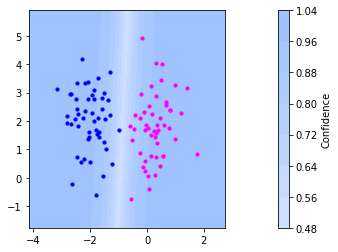

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cm_0 = LinearSegmentedColormap.from_list("mycmap", ["#ffffff","#a0c3ff"])
def plot_conf(classifier_prob, show_class_assignment=False, x_max=20, y_max=20, x_min=-1, y_min=-1):
    d,c = 2, len(clf.classes_)
    #plt.set_cmap(cm_0)
    x_ = np.arange(x_min, x_max, 0.05)
    y_ = np.arange(y_min, y_max, 0.05)

    xx, yy = np.meshgrid(x_, y_)
    XY = np.array([xx,yy]).reshape(2,x_.shape[0]*y_.shape[0]).T
    Z = classifier_prob(XY).T
    Z = Z.reshape(c,y_.shape[0],x_.shape[0])

    h = plt.contourf(x_,y_,Z.max(axis=0), cmap=cm_0)
    plt.clim(0, 1)   
    cb = plt.colorbar()
    cb.set_label('Confidence')
    plt.axis('scaled')
     
X, y = make_blobs(n_samples=100, centers=[[-5, 0], [0, 1.5]], random_state=40)
transformation = np.array([[0.4, 0.2], [-0.4, 1.2]]).T
X = np.dot(X, transformation)

clf = LogisticRegression(
    solver="sag", max_iter=100, random_state=42).fit(X, y)

plot_conf(clf.predict_proba,show_class_assignment=False, x_max =max(X[:,0])+1, y_max =max(X[:,1])+1, x_min =min(X[:,0])-1, y_min =min(X[:,1])-1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', s=10)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='magenta', s=10)
plt.show()

The confidence in logistic regression is modeled by a probability measuring how likely a sample belongs to the positive class. 

$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^\top \mathbf{x} + b).
$$

This probability is computed over the sigmoid function 
$$\sigma(x) = \frac{1}{1 + \exp^{-x}}.$$
Recall from what we discussed regarding the SVM that $\lvert\mathbf{w}^\top \mathbf{x} + b\rvert = dist(\mathbf{x},\mathcal{H}_{\vvec{w},b})\lVert\vvec{w}\rVert$ is the scaled distance of point $\vvec{x}$ to the hyperplane defined by $\vvec{w}$ and $b$. The sigmoid function maps this scaled distance onto a probability between 0 and 1.
The plot below shows the sigmoid function.


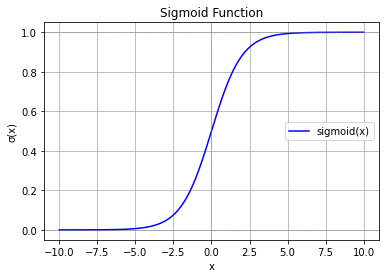

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create input values
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

# Plot
plt.plot(x, y, label='sigmoid(x)', color='blue')
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axhline(1, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.legend()
plt.show()


For multiclass classification, the softmax regression generalizes logistic regression to $c$ classes by learning one hyperplane per class. The more a point lies on the positive side of a hyperplane, the more confidently it is assigned to that class. The confidence is again interpreted as a probability that a sample belongs to a class, which is now computed over the softmax function. 
```{prf:definition} Softmax Regression
The **softmax regression** (a.k.a. multinomial logistic regression) classifier computes the probability that point $\vvec{x}$ belongs to class $y$ by means of $c$ hyperplanes, defined by parameters $\vvec{w}_l$ and $b_l$. Gathering the $c$ hyperplane defining parameters in a matrix $W$, such that $W_{l\cdot} = \vvec{w}_l^\top$, and $\vvec{b}$, then the softmax regression classifier models the probability that point $\vvec{x}$ belongs to class $l$ over the parameters $W$ and $\vvec{b}$
$$
f_{sr}(\vvec{x})_l=p(y = l \mid \mathbf{x},W,\vvec{b}) =\mathrm{softmax}(W\vvec{x}+\vvec{b})_l= \frac{\exp(\vvec{w}_l^\top \mathbf{x} + b_l)}{\sum_{j=1}^{c} \exp(\mathbf{w}_j^\top \mathbf{x} + b_j)}
$$
```
The softmax function $\mathrm{softmax}:\mathbb{R}^d\rightarrow [0,1]^c$, $\mathrm{softmax}(\vvec{x})_y=\frac{\exp(x_y)}{\sum_{j=1}^c\exp{x_j}}$ returns a vector reflecting the confidences for each class. We can easily show the confidences sum up to one. The plot below show the confidences and the hyperplanes learned for a 3-class classification problem.  


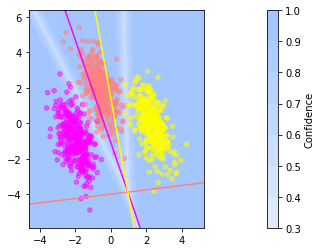

In [10]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

multi_class  = "multinomial"
clf = LogisticRegression(
    solver="sag", max_iter=100, random_state=42, multi_class=multi_class
).fit(X, y)


coef = clf.coef_
intercept = clf.intercept_
plot_conf(clf.predict_proba,show_class_assignment=False, x_max =max(X[:,0])+1, y_max =max(X[:,1])+1, x_min =min(X[:,0])-1, y_min =min(X[:,1])-1)
sc = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.5, cmap="spring")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],  color=color)

#cmap = plt.cm.get_cmap("gist_rainbow")

for k in clf.classes_:
    plot_hyperplane(k, sc.to_rgba(k))
plt.show()

### Training
`````{admonition} Task (softmax regression)
:class: tip
:name: softmax_regr_task
**Given** a classification training data set that is sampled i.i.d. $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n, y_i\in\{1,\ldots,c\}\}$.       

**Find** the parameters $\theta=(W,\vvec{b})$ such that the posterior probabilities, that are modeled as
$$p(y=l\mid \vvec{x},\theta) = \softmax(W\vvec{x}+\vvec{b})_l$$
are maximized
:::{math}
:label: eq:obj_smr
\begin{align*}\max_{\theta}\mathcal{L}(\theta,\mathcal{D}) = \prod_{i=1}^n p(y=y_i\mid \vvec{x}_i,\theta)\end{align*}
:::
**Return** the classifier defining parameters $\theta$.
`````
As discussed in the scope of naive Bayes, computing the product of probabilities is generally not a good idea, because we might run into underflow. Hence, we apply again the log-probabilities trick and minimize the log-probabilities instead of the probabilities directly. We divide by the number of samples in the dataset and apply the logarithm to Eq. {eq}`eq:obj_smr` and obtain the equivalent objective
\begin{align*}
\max_{\theta} \frac1n \log(\prod_{i=1}^n p(y=y_i\mid \vvec{x}_i,\theta)) =
\max_{\theta} \frac1n \sum_{i=1}^n\log p(y=y_i\mid \vvec{x}_i,\theta)
\end{align*}
Instead of maximizing the logarithmic values, which are negative, we further multiply with minus one and obtain the following equivalent objective, introducing the cross entropy:
\begin{align*}
\min_{\theta} -\frac1n \sum_{i=1}^n\log p(y=y_i\mid \vvec{x}_i,\theta)=
\min_{\theta} \frac1n \sum_{i=1}^nCE(y_i,p(y\mid \vvec{x}_i,\theta)).
\end{align*}
```{prf:definition} Cross-entropy
The cross entropy is a function $CE:\{1,\ldots,c\}\times [0,1]^c\rightarrow \mathbb{R}_+$,
mapping a label $y\in\{1,\ldots,c\}$ and a probability vector $\vvec{z}\in[0,1]^c$ to the negative logarithm of the probability vector at position $y$:
$$CE(y,\vvec{z}) = -\log(z_y).$$
```
Cross entropy is a popular loss for classification tasks, since it penalizes heavily low probability predictions for the correct class. In addition, applying the logarithm to the softmax output dampenes the vanishing gradient effect that the sigmoid and softmax function are suffering from. Hence, applying Cross-Entropy as a loss helps to numerically optimize the softmax output of the softmax regression classifier.
### Softmax Regression as a Computational Graph
The plot below shows a visualization of the softmax regression model as it is common for neural networks. The affine function is visualized by the edges connecting the input layer on the left with the output layer. The output layer has $c$ nodes, one for each class. Every edge has a weight that is given by the matrix $W$. For example, the edge from input node $x_i$ to output class node $l$ is $W_{il}$. At each output node, the weighted sum of the edge weights multiplied with the input is computed, the bias term is added and the softmax function is applied.
```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

\foreach \m [count=\y] in {1,missing,2}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (1.5,1.5-\y) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \l [count=\i] in {1,c}
  \draw [->] (output-\i) -- ++(2.8,0)
    node [above, midway] {$\mathrm{softmax}(W\mathbf{x}+\mathbf{b})_\l$};

\foreach \i in {1,...,4}
  \foreach \j in {1,...,2}
    \draw [->] (input-\i) -- (output-\j);


\node [above right=-0.1cm and 0.8cm of input-1.north] {$W$};
\end{tikzpicture}
```
The output of the final layer before the application of the softmax function are also called the **logits**. For the simple softmax regression problem, the logits are hence given by the vector $\vvec{z} = W\vvec{x}+\vvec{b}$. 

### Representation Learning

Logistic or Softmax regression rely on linear decision boundaries. In practice, data often lies on complex, nonlinear manifolds. Hence, we apply a similar trick as we have seen in linear regression and the SVM to use a linear model for nonlinear problems by appling a feature transformation first. In regression, the feature transformation is given by the basis functions and in the SVM it is implicitly defined over the kernel. Neural networks **learn the feature transformation** by stacking various simple functions after one another, whose parameters are optimized jointly with the classifier's parameters. That is we get something that looks like that:

```{tikz}
\tikzset{%
  every neuron/.style={
    circle,
    draw,
    minimum size=0.5cm
  },
  neuron missing/.style={
    draw=none, 
    scale=2,
    text height=0.25cm,
    execute at begin node=$\vdots$
  },
}

\begin{tikzpicture}[x=1.5cm, y=1cm, >=stealth]

\foreach \m/\l [count=\y] in {1,2,3,missing,4}
  \node [every neuron/.try, neuron \m/.try] (input-\m) at (0,2.5-\y) {};

\foreach \m [count=\y] in {1,missing,2}
  \node [every neuron/.try, neuron \m/.try ] (hidden1-\m) at (1.3,2.4-\y*1.5) {};

\foreach \m [count=\y] in {1,missing,2}
  \node [every neuron/.try, neuron \m/.try ] (hidden2-\m) at (3,2.4-\y*1.5) {};

\foreach \m [count=\y] in {1,missing,2}
  \node [every neuron/.try, neuron \m/.try ] (output-\m) at (4.5,1.5-\y) {};

\foreach \l [count=\i] in {1,2,3,d}
  \draw [<-] (input-\i) -- ++(-0.7,0)
    node [above, midway] {$x_\l$};

\foreach \l [count=\i] in {1,d_L}
  \node [above] at (hidden2-\i.north) {$\phi(x)_{\l}$};

\foreach \l [count=\i] in {1,c}
  \draw [->] (output-\i) -- ++(3,0)
    node [above, midway] {$\mathrm{softmax}(W\phi(\mathbf{x})+\mathbf{b})_\l$};

\foreach \i in {1,...,4}
  \foreach \j in {1,...,2}
    \draw [->] (input-\i) -- (hidden1-\j);

\foreach \i in {1,...,2}
  \foreach \j in {1,...,2}
    \draw [->] (hidden1-\i) -- (hidden2-\j);

    \draw [->] (hidden2-1) -- (output-1);
    \draw [->] (hidden2-2) -- (output-1);
    \draw [->] (hidden2-1) -- (output-2);
    \draw [->] (hidden2-2) -- (output-2);
\node [above right=-0.1cm and 0.8cm of hidden2-1.north] {$W$};

\node[scale=2,inner xsep=0pt,inner ysep=5mm] at ($(hidden1-1)!.5!(hidden2-2)$) {$\dots$};

    

\end{tikzpicture}
```

On the left we see the vector $\vvec{x}$ being put as input to the graph, producing an intermediate output $\phi(\vvec{x})$, that is the feature transformation that is classified with a softmax regression, creating the output of the graph. We discuss in the following how we can interpret this graph and how the feature transformation $\phi$ is computed. 